In [40]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
import statsmodels.formula.api as smapi
import seaborn as sb

In [39]:
df = pd.read_csv (r'PhirimeTrends.csv')
lm=smapi.ols(formula="Trends~Yrs", data=df).fit()
lm.summary()

C:\Users\Phirime\Anaconda3\lib\site-packages\scipy\stats\stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Trends   R-squared:                       0.106
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     1.063
Date:                Fri, 07 Aug 2020   Prob (F-statistic):              0.329
Time:                        12:48:50   Log-Likelihood:                -67.346
No. Observations:                  11   AIC:                             138.7
Df Residuals:                       9   BIC:                             139.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.605e+04   2.34e+04      1.114      0.294   -2.68e+04    7.89e+04
Yrs          -11.9909     11.629     -1.031      0.329     -38.298      14.317
==============================================================================
Omnibus:                        0.646   Durbin-Watson:                   0.474
Prob(Omnibus):                  0.724   Jarque-Bera (JB):                0.575
Skew:                          -0.171   Prob(JB):                        0.750
Kurtosis:                       1.933   Cond. No.                     1.28e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.28e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

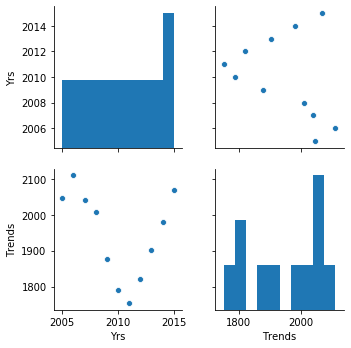

In [41]:
sb.pairplot(df)

In [5]:
df.head(11)

,Yrs,Trends
0,2005,2046
1,2006,2111
2,2007,2040
3,2008,2009
4,2009,1877
5,2010,1790
6,2011,1753
7,2012,1822
8,2013,1903
9,2014,1981


In [6]:
df.shape

(11, 2)

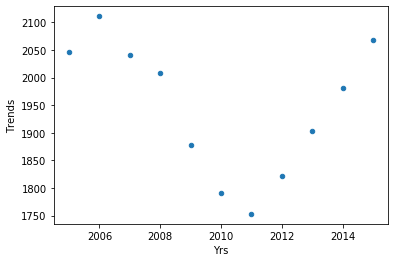

In [7]:
df.plot(kind='scatter', x='Yrs', y='Trends')
plt.show()

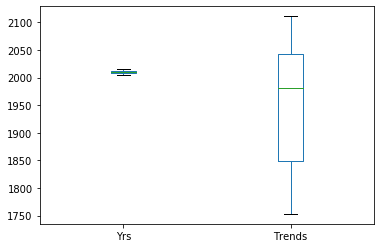

In [8]:
df.plot(kind='box')
plt.show()

In [9]:
df.corr() #Coefficients

,Yrs,Trends
Yrs,1.000000,-0.325033
Trends,-0.325033,1.000000


In [10]:
Years=pd.DataFrame(df['Yrs'])
Murder_Trends=pd.DataFrame(df['Trends'])

In [11]:
Years

,Yrs
0,2005
1,2006
2,2007
3,2008
4,2009
5,2010
6,2011
7,2012
8,2013
9,2014


In [12]:
#Build Linear regression Model
lm= linear_model.LinearRegression()
model =lm.fit(Years, Murder_Trends )

In [13]:
model.coef_

array([[-11.99090909]])

In [14]:
model.intercept_

array([26047.18181818])

In [15]:
model.score(Years, Murder_Trends) #Evaluate the model

0.10564661574691625

In [16]:
#Predict new value of 2016 murder Trends 
X=([2016])
X=pd.DataFrame(X)
Y=model.predict(X)
Y=pd.DataFrame(Y)
df=pd.concat([X,Y], axis=1, keys=['Year New', 'Murder Prediction'])
df


,Year New,Murder Prediction
,0,0
0,2016,1873.509091


In [20]:

#Predict more values
X=([2016, 2017, 2018,2019,2020])
X=pd.DataFrame(X)
Y=model.predict(X)
Y=pd.DataFrame(Y)
df=pd.concat([X,Y], axis=1, keys=['Year', 'Murder_Trends']) 
df

,Year,Murder_Trends
,0,0
0,2016,1873.509091
1,2017,1861.518182
2,2018,1849.527273
3,2019,1837.536364
4,2020,1825.545455


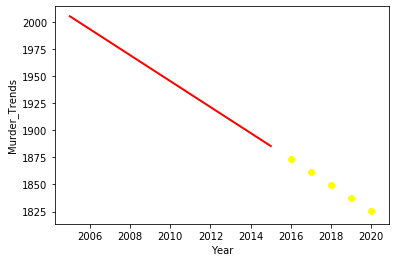

In [33]:
#df.plot(kind='scatter', x='Yrs', y='Trends')
#visualizing the results
df.plot(kind='scatter', x='Year', y='Murder_Trends')
#plotting the regression line 
plt.plot(Years,model.predict(Years), color='red', linewidth=2)
#plotting the predict values
plt.scatter(X ,Y, color='yellow')
#plt.plot(X, Y, color='blue', linewidth=5)
plt.show()